In [7]:
import torchvision
import torch
from torch import nn
import matplotlib.pyplot as plt
import utils
from dataloaders import load_cifar10, load_cifar10_augmented, load_cifar10_task4, load_cifar10_task4_augmented
from trainer import Trainer, Trainer_task4, compute_loss_and_accuracy

In [5]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10) # No need to apply softmax,
        # as this is done in nn.CrossEntropyLoss
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers

    def forward(self, x):
        x = self.model(x)
        return x

In [8]:
epochs = 10
batch_size = 32
learning_rate = 5e-4
early_stop_count = 4

dataloaders = load_cifar10_task4(batch_size)
model = Model()
trainer = Trainer_task4(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()
final_train_loss , final_train_accuracy = compute_loss_and_accuracy(dataloaders[0], trainer.model, trainer.loss_criterion)
final_val_loss , final_val_accuracy = compute_loss_and_accuracy(dataloaders[1], trainer.model, trainer.loss_criterion)
final_test_loss , final_test_accuracy = trainer.model_test()

print("Train Accuracy: " + str(final_train_accuracy))
print("Test Accuracy: " + str(final_test_accuracy))
print("Validation Accuracy: " + str(final_val_accuracy))

print("Train Loss: " + str(final_train_loss))
print("Test Loss: " + str(final_test_loss))
print("Validation Loss: " + str(final_val_loss))

Files already downloaded and verified
Files already downloaded and verified


c:\Users\joerg\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\joerg\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

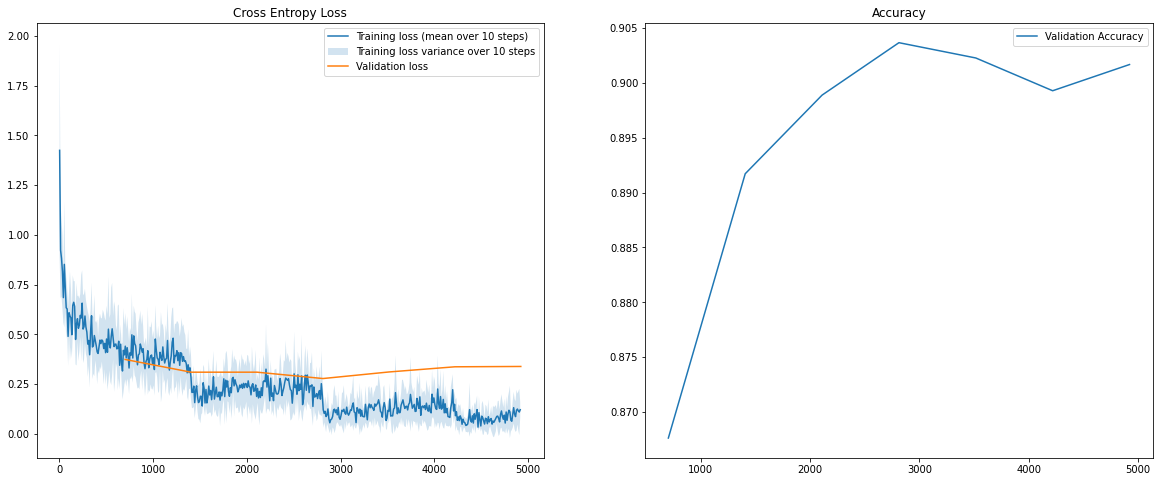

In [9]:
from task2 import create_plots
create_plots(trainer, "Resnet")